In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
performance = pd.read_csv("data/performance.csv")

In [3]:
performance.head()

,rows,mode,load_time,cpu_percent,size
0,100000,parquet,0.012878,0.0,1227135
1,100000,pickle.gzip,0.006120,0.0,152390
2,100000,parquet,0.012311,0.0,1227135
3,100000,msgpack,0.006454,0.0,1000455
4,100000,HD5,0.014127,18.2,2860440


In [4]:
normalized_perf = performance
normalized_perf['load_time_per_row'] = performance.load_time / performance.rows
normalized_perf['size_per_row'] = performance.size / performance.rows
normalized_perf.head()

,rows,mode,load_time,cpu_percent,size,load_time_per_row,size_per_row
0,100000,parquet,0.012878,0.0,1227135,1.287755e-07,0.00144
1,100000,pickle.gzip,0.006120,0.0,152390,6.119748e-08,0.00144
2,100000,parquet,0.012311,0.0,1227135,1.231064e-07,0.00144
3,100000,msgpack,0.006454,0.0,1000455,6.453588e-08,0.00144
4,100000,HD5,0.014127,18.2,2860440,1.412691e-07,0.00144


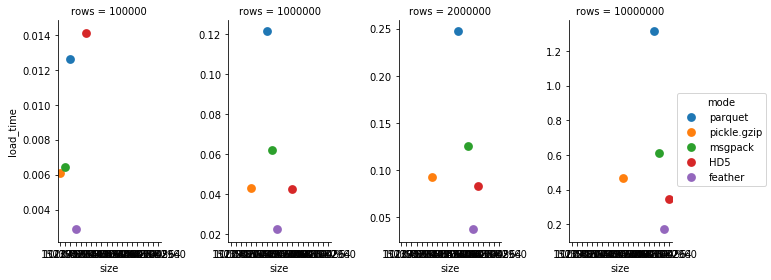

In [5]:
g = sns.factorplot(x="size", y="load_time", col="rows",
                    data=performance, hue='mode', saturation=.5,
                    kind="point", ci=None, aspect=.6, sharex=False, sharey=False)

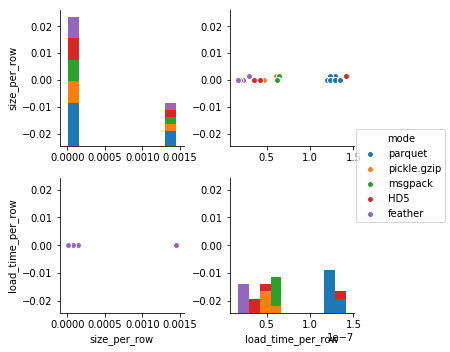

In [6]:
sns.pairplot(normalized_perf[['size_per_row', 'load_time_per_row', 'mode']], hue='mode')

In [7]:
real_perf = pd.read_csv("data/real_performance.csv")

In [9]:
real_perf.head()

,file_name,mode,load_time,cpu_percent,size
0,file_w_12cols_3Mrows,parquet,3.149990,13.6,16663297
1,file_w_12cols_3Mrows,msgpack,3.163830,14.3,290980635
2,file_w_12cols_3Mrows,HD5,11.254267,18.6,545296720
3,file_w_12cols_3Mrows,feather,2.101901,13.1,365702744
4,file_w_12cols_3Mrows,pickle.gzip,324.434662,18.0,55683418


Text(39.3667,0.5,'load_time')

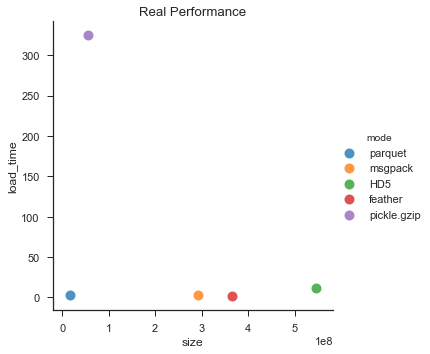

In [8]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('size', # Horizontal axis
           'load_time', # Vertical axis
           data=real_perf, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="mode", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('Real Performance')

# Set x-axis label
plt.xlabel('size')

# Set y-axis label
plt.ylabel('load_time')